# UFC Fight Result Prediction

Info:
- Make sure that the UFC.csv file provided with this notebook is located in the same folder before running the file.
- For more details regarding this mini-project feel free to check out the Python_Project_UFC.pdf file in my repository.

#### Installing and importing libraries

In [6]:
#!pip install --upgrade pip
!pip install plotly
!pip install scikit-learn

In [7]:
import pandas as pd
import numpy as np
import plotly
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading dataset

In [19]:
data = pd.read_csv(r'UFC.csv')

# Checking for missing values
nan_cols = [i for i in data.columns if data[i].isnull().any()]
print('Empty columns:', nan_cols)

# Dropping irrelevant columns
data = data.drop(['B_total_time_fought(seconds)','B_total_time_fought(seconds)'], axis=1)
# Replacing boolean values with numbers (1:True, 0:False)
data['title_fight'] = np.where(data['title_fight'] == True, 1,0)

Empty columns: []


#### EDA

From this plot we can observe that Red side has more wins than Blue side, accounting for 66,25% of the total wins

In [20]:
import plotly.express as px
import plotly.graph_objects as go

values = data.Winner.value_counts()
labels = values.index

colors = ['crimson','blue']

fig = go.Figure()

fig.add_trace(go.Bar(
    x=labels,
    y=values,
    name='Wins by corner color',
    marker_color=colors,
    text=values,
    textposition='auto'
))

# Updating the layout
fig.update_layout(title="Wins by corner color")
fig.layout.title.pad.l = 365
fig.layout.title.font.family = 'Raleway'

fig.update_layout(
        showlegend=False,
        yaxis=dict(title='Total wins'),
        xaxis=dict(title='Corner color')
)
fig.show()

Displaying the number of title fights among all fights

In [21]:
values = data.title_fight.value_counts()
labels = ['Non-title fights','Title fights']
colors = ['green','blue']

fig = go.Figure()

fig.add_trace(go.Pie(
    values=values,
    labels=labels
))

fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.show()

The ages for both corners seem to follow a normal distribution. On average, younger fighters appear on the blue side, but the overall age difference between the two sides is not significant, since both ages average to almost 30.

In [22]:
import plotly.express as px
import plotly.graph_objects as go

values = data.B_age.value_counts()
values2 = data.R_age.value_counts()
labels = values.index
labels2 = values2.index

sumblue = data.B_age.sum()
sumred = data.R_age.sum()
meanblue = round(sumblue/len(data),2)
meanred = round(sumred/len(data),2)
print('Mean blue corner age:',meanblue,'\nMean red corner age:',meanred)


fig = go.Figure()

fig.add_trace(go.Bar(
    x=labels,
    y=values,
    name='Age Blue corner',
    text=values,
    textposition='auto'
))
fig.add_trace(go.Bar(
    x=labels2,
    y=values2,
    name='Age Red corner',
    text=values,
    textposition='auto'
))

# Updating the layout
fig.update_layout(title="Age by corner color")
fig.layout.title.pad.l = 345
fig.layout.title.font.family = 'Raleway'

fig.update_layout(
        showlegend=False,
        yaxis=dict(title='Frequency'),
        xaxis=dict(title='Age')
)
fig.show()

Mean blue corner age: 29.64 
Mean red corner age: 29.93


Getting central tendency and variance measures for all numerical data

In [23]:
data.describe().round(2)

,title_fight,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_attempted_strikes,B_avg_BODY_landed_strikes,B_avg_CLINCH_attempted_strikes,B_avg_CLINCH_landed_strikes,B_avg_DISTANCE_att,...,R_age,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
count,3592.00,3592.00,3592.00,3592.00,3592.0,3592.00,3592.00,3592.00,3592.00,3592.00,...,3592.00,3592.00,3592.00,3592.00,3592.0,3592.00,3592.00,3592.00,3592.00,3592.00
mean,0.07,3.20,0.56,1.13,0.0,8.80,6.16,8.31,5.62,53.93,...,29.93,0.00,0.77,0.00,0.2,0.03,0.00,0.76,0.21,0.03
std,0.26,0.66,0.79,1.39,0.0,7.10,5.08,7.52,5.42,41.19,...,4.14,0.04,0.42,0.02,0.4,0.18,0.06,0.43,0.41,0.16
min,0.00,1.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,19.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
25%,0.00,3.00,0.00,0.00,0.0,3.67,2.50,3.00,2.00,23.00,...,27.00,0.00,1.00,0.00,0.0,0.00,0.00,1.00,0.00,0.00
50%,0.00,3.00,0.00,1.00,0.0,7.00,5.00,6.47,4.28,45.42,...,30.00,0.00,1.00,0.00,0.0,0.00,0.00,1.00,0.00,0.00
75%,0.00,3.00,1.00,2.00,0.0,12.28,8.50,11.50,7.86,74.72,...,33.00,0.00,1.00,0.00,0.0,0.00,0.00,1.00,0.00,0.00
max,1.00,5.00,6.00,12.00,0.0,49.00,39.00,87.00,68.00,271.00,...,46.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00


Checking age, height, weight and reach distribution for all fighters

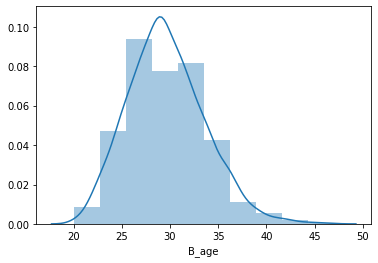

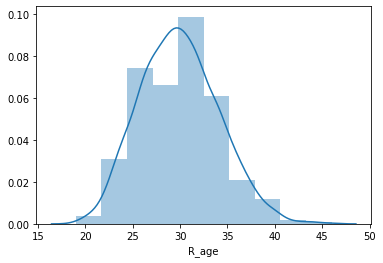

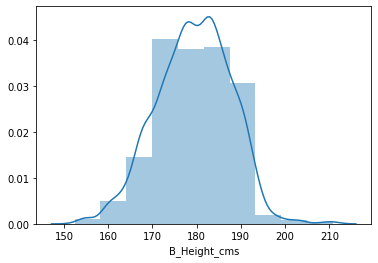

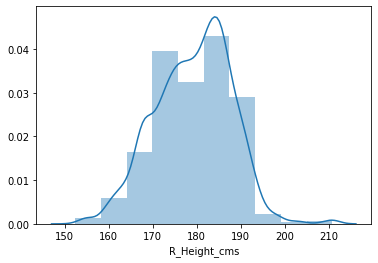

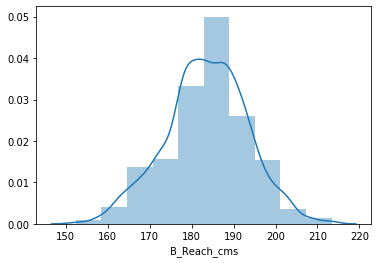

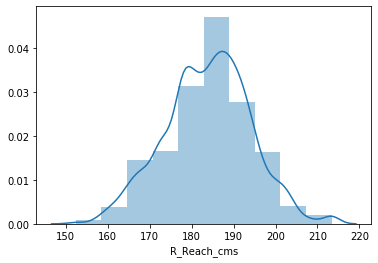

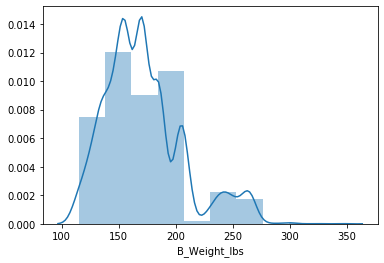

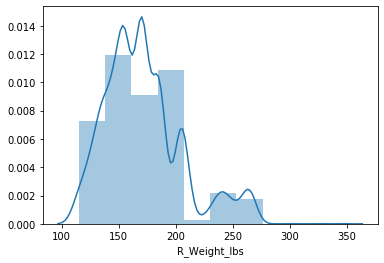

In [24]:
cols = ['B_age','R_age','B_Height_cms','R_Height_cms','B_Reach_cms','R_Reach_cms','B_Weight_lbs','R_Weight_lbs']
for i in cols:
    sns.distplot(data[i], bins=10)
    plt.show()

### Feature Engineering

In [25]:
# Feature Engineering for Blue Fighter

data['B_avg_BODY_succesful_strikes'] = np.round(np.where(data['B_avg_BODY_attempted_strikes'] > 0, data['B_avg_BODY_landed_strikes']/data['B_avg_BODY_attempted_strikes'], 0), 2)
data = data.drop(['B_avg_BODY_attempted_strikes','B_avg_BODY_landed_strikes'],axis=1)

data['B_avg_CLINCH_succesful_strikes'] = np.round(np.where(data['B_avg_CLINCH_attempted_strikes'] > 0, data['B_avg_CLINCH_landed_strikes']/data['B_avg_CLINCH_attempted_strikes'], 0), 2)
data = data.drop(['B_avg_CLINCH_landed_strikes','B_avg_CLINCH_attempted_strikes'],axis=1)

data['B_avg_DISTANCE_succesful'] = np.round(np.where(data['B_avg_DISTANCE_att'] > 0, data['B_avg_DISTANCE_landed']/data['B_avg_DISTANCE_att'], 0), 2)
data = data.drop(['B_avg_DISTANCE_landed','B_avg_DISTANCE_att'],axis=1)

data['B_avg_GROUND_succesful_strikes'] = np.round(np.where(data['B_avg_GROUND_attempted_strikes'] > 0, data['B_avg_GROUND_landed_strikes']/data['B_avg_GROUND_attempted_strikes'], 0), 2)
data = data.drop(['B_avg_GROUND_landed_strikes','B_avg_GROUND_attempted_strikes'],axis=1)

data['B_avg_HEAD_succesful_strikes'] = np.round(np.where(data['B_avg_HEAD_attempted_strikes'] > 0, data['B_avg_HEAD_landed_strikes']/data['B_avg_HEAD_attempted_strikes'], 0), 2)
data = data.drop(['B_avg_HEAD_attempted_strikes','B_avg_HEAD_landed_strikes'],axis=1)

data['B_avg_succesful_kicks'] = np.round(np.where(data['B_avg_kicks_attempted'] > 0, data['B_avg_kicks_landed']/data['B_avg_kicks_attempted'], 0), 2)
data = data.drop(['B_avg_kicks_landed','B_avg_kicks_attempted'],axis=1)

data['B_avg_succesful_significant_strikes'] = np.round(np.where(data['B_avg_significant_strikes_attempted'] > 0, data['B_avg_Significant_Strikes_landed']/data['B_avg_significant_strikes_attempted'], 0), 2)
data = data.drop(['B_avg_Significant_Strikes_landed','B_avg_significant_strikes_attempted', 'B_avg_SIG_STR_pct'],axis=1)

data['B_avg_succesful_TD'] = np.round(np.where(data['B_avg_TD_att'] > 0, data['B_avg_TD_landed']/data['B_avg_TD_att'], 0), 2)
data = data.drop(['B_avg_TD_att','B_avg_TD_landed', 'B_avg_TD_pct'],axis=1)

data['B_avg_succesful_TOTAL_STR'] = np.round(np.where(data['B_avg_TOTAL_STR_att'] > 0, data['B_avg_TOTAL_STR_landed']/data['B_avg_TOTAL_STR_att'], 0), 2)
data = data.drop(['B_avg_TOTAL_STR_landed', 'B_avg_TOTAL_STR_att'],axis=1)

# Checking for missing values
nan_cols = [i for i in data.columns if data[i].isnull().any()]
print('Empty columns:', nan_cols)

Empty columns: []


In [26]:
# Feature Engineering for Red Fighter

data['R_avg_BODY_succesful_strikes'] = np.round(np.where(data['R_avg_BODY_att'] > 0, data['R_avg_BODY_landed']/data['R_avg_BODY_att'], 0), 2)
data = data.drop(['R_avg_BODY_att','R_avg_BODY_landed'],axis=1)

data['R_avg_CLINCH_succesful_strikes'] = np.round(np.where(data['R_avg_CLINCH_att'] > 0, data['R_avg_CLINCH_landed']/data['R_avg_CLINCH_att'], 0), 2)
data = data.drop(['R_avg_CLINCH_landed','R_avg_CLINCH_att'],axis=1)

data['R_avg_DISTANCE_succesful'] = np.round(np.where(data['R_avg_DISTANCE_att'] > 0, data['R_avg_DISTANCE_landed']/data['R_avg_DISTANCE_att'], 0), 2)
data = data.drop(['R_avg_DISTANCE_landed','R_avg_DISTANCE_att'],axis=1)

data['R_avg_GROUND_succesful_strikes'] = np.round(np.where(data['R_avg_GROUND_att'] > 0, data['R_avg_GROUND_landed']/data['R_avg_GROUND_att'], 0), 2)
data = data.drop(['R_avg_GROUND_landed','R_avg_GROUND_att'],axis=1)

data['R_avg_HEAD_succesful_strikes'] = np.round(np.where(data['R_avg_HEAD_att'] > 0, data['R_avg_HEAD_landed']/data['R_avg_HEAD_att'], 0), 2)
data = data.drop(['R_avg_HEAD_att','R_avg_HEAD_landed'],axis=1)

data['R_avg_succesful_kicks'] = np.round(np.where(data['R_avg_LEG_att'] > 0, data['R_avg_LEG_landed']/data['R_avg_LEG_att'], 0), 2)
data = data.drop(['R_avg_LEG_landed','R_avg_LEG_att'],axis=1)

data['R_avg_succesful_significant_strikes'] = np.round(np.where(data['R_avg_SIG_STR_att'] > 0, data['R_avg_SIG_STR_landed']/data['R_avg_SIG_STR_att'], 0), 2)
data = data.drop(['R_avg_SIG_STR_landed','R_avg_SIG_STR_att', 'R_avg_SIG_STR_pct'],axis=1)

data['R_avg_succesful_TD'] = np.round(np.where(data['R_avg_TD_att'] > 0, data['R_avg_TD_landed']/data['R_avg_TD_att'], 0), 2)
data = data.drop(['R_avg_TD_att','R_avg_TD_landed', 'R_avg_TD_pct'],axis=1)

data['R_avg_succesful_TOTAL_STR'] = np.round(np.where(data['R_avg_TOTAL_STR_att'] > 0, data['R_avg_TOTAL_STR_landed']/data['R_avg_TOTAL_STR_att'], 0), 2)
data = data.drop(['R_avg_TOTAL_STR_landed', 'R_avg_TOTAL_STR_att'],axis=1)

# Checking for missing values
nan_cols = [i for i in data.columns if data[i].isnull().any()]
print('Empty columns:', nan_cols)

Empty columns: []


#### Rounding data to 2 decimal digits

In [27]:
data = data.round(2)

#### Splitting to test and train, Removing outliers and Label Encoding

In [32]:
# Splitting to test and train set
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.25)
print('Train test length:',len(train),'\nTest set length:',len(test))

from sklearn.neighbors import LocalOutlierFactor
outliers_to_check = []
for col in data.columns: 
    if col != 'Winner': 
        outliers_to_check.append(col)

# Running LOF on the train set to detect outliers
loc = LocalOutlierFactor(n_neighbors = 10, contamination = 0.05)
outliers_loc = loc.fit_predict(train[outliers_to_check])
train['outlier'] = pd.DataFrame(outliers_loc)

# Showing outliers
print()
print(train.groupby(["outlier","Winner"]).size())

# Dropping outliers
train = train[(train.outlier != -1)]
train = train.drop("outlier", axis=1)

# Further splitting train and test set
y_train = train['Winner']
X_train = train.drop(['Winner'],axis=1)
y_test = test['Winner']
X_test = test.drop(['Winner'],axis=1)

# Encoding the Winner column (1 is red, 0 is blue)
from sklearn.preprocessing import LabelEncoder
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

Train test length: 2694 
Test set length: 898

outlier  Winner
-1.0     Blue        52
         Red         56
 1.0     Blue       806
         Red       1108
dtype: int64


C:\Users\D.Petkidis\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Standarizing training data

In [33]:
from sklearn.preprocessing import StandardScaler

to_standarize = ['B_avg_KD', 'B_avg_guard_passed','B_avg_Reversals', 
                 'B_avg_SUB_ATT','B_Height_cms', 'B_Reach_cms','B_Weight_lbs',
                 'R_avg_KD', 'R_avg_PASS', 'R_avg_REV', 'R_avg_SUB_ATT',
                 'R_Height_cms', 'R_Reach_cms','R_Weight_lbs', 'B_avg_BODY_succesful_strikes',
                 'B_avg_CLINCH_succesful_strikes', 'B_avg_DISTANCE_succesful',
                 'B_avg_GROUND_succesful_strikes', 'B_avg_HEAD_succesful_strikes',
                 'B_avg_succesful_kicks', 'B_avg_succesful_significant_strikes',
                 'B_avg_succesful_TD', 'B_avg_succesful_TOTAL_STR',
                 'R_avg_BODY_succesful_strikes', 'R_avg_CLINCH_succesful_strikes',
                 'R_avg_DISTANCE_succesful', 'R_avg_GROUND_succesful_strikes',
                 'R_avg_HEAD_succesful_strikes', 'R_avg_succesful_kicks',
                 'R_avg_succesful_significant_strikes', 'R_avg_succesful_TD',
                 'R_avg_succesful_TOTAL_STR']


# Standardizing the features of the train set
X_train[to_standarize] = StandardScaler().fit_transform(X_train[to_standarize].values)
X_test[to_standarize] = StandardScaler().fit_transform(X_test[to_standarize].values)

#### Random Forest

col_0   0    1
row_0         
0      41  256
1      29  572
F1-score: 0.8005598320503848
AUC score: 0.544897113116747


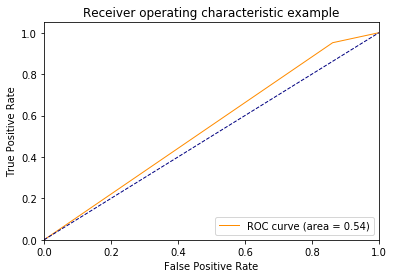

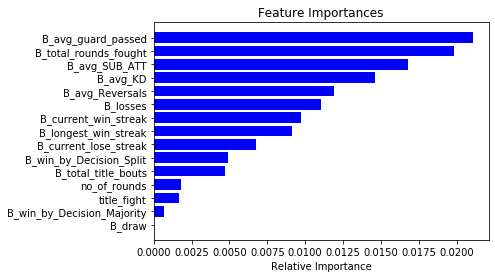

In [34]:
import sklearn.ensemble as e
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
import pprint

rf = e.RandomForestClassifier()
# # Optimizing hyperparameters while using 5-fold Cross validation
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [70, 80, 90, 100, 110],
#     'n_estimators': [20, 50, 70, 100, 150, 200, 300, 1000]
# }
# clf = GridSearchCV(rf, param_grid)
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 1)
# grid_search.fit(X_train, y_train)
# pprint.pprint(grid_search.best_params_)
# pprint.pprint(grid_search.best_score_)

# Optimal results were found to be:
# 'bootstrap': True, 'max_depth': 90, 'n_estimators': 1000

clf = e.RandomForestClassifier(bootstrap=True, max_depth=90, n_estimators=1000)
clf.fit(X_train,y_train)
preds = clf.predict(X_test)

# Confusion matrix
print(pd.crosstab(y_test,preds))
# Other metrics
print('F1-score:', f1_score(y_test, preds))
print('AUC score:', roc_auc_score(y_test, preds))

# Compute ROC curve and plot the ROC area for class Red
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, preds)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plotting the feature importance barplot
features = []
for col in X_train.columns:
    features.append(col)
importances = clf.feature_importances_[:15]
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Gradient Boost

col_0   0    1
row_0         
0      51  246
1      41  560
F1-score: 0.7960199004975124
AUC score: 0.5517487688868721


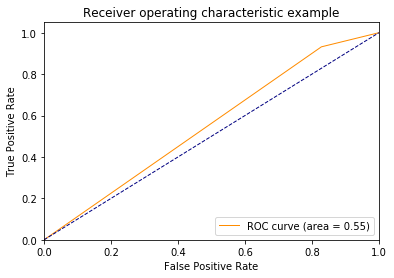

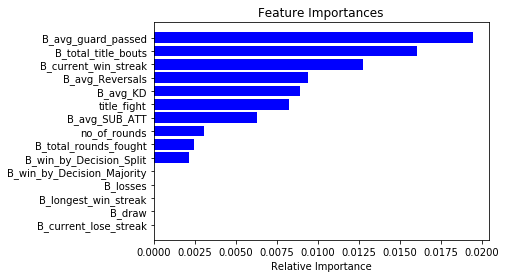

In [35]:
import sklearn.ensemble as e
from sklearn.metrics import f1_score,roc_auc_score 
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
import pprint

rf = e.GradientBoostingClassifier()
# # Optimizing hyperparameters while using 5-fold Cross validation
# param_grid = {
#     'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 
#     'n_estimators':[20, 50, 70, 100, 150, 200, 300, 1000],
#     'max_depth': [70, 80, 90, 100, 110],
# }
# clf = GridSearchCV(rf, param_grid)
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 1)
# grid_search.fit(X_train, y_train)
# pprint.pprint(grid_search.best_params_)
# pprint.pprint(grid_search.best_score_)


clf = e.GradientBoostingClassifier(n_estimators=50)
clf.fit(X_train,y_train)
preds = clf.predict(X_test)

# Confusion matrix
print(pd.crosstab(y_test,preds))
# Other metrics
print('F1-score:', f1_score(y_test, preds))
print('AUC score:', roc_auc_score(y_test, preds))

# Compute ROC curve and ROC area for class Red
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, preds)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plotting the feature importance barplot
features = []
for col in X_train.columns:
    features.append(col)
importances = clf.feature_importances_[:15]
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Decision Tree

col_0    0    1
row_0          
0      128  169
1      198  403
F1-score: 0.6871270247229327
AUC score: 0.5507627579175


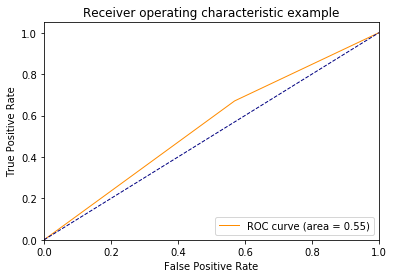

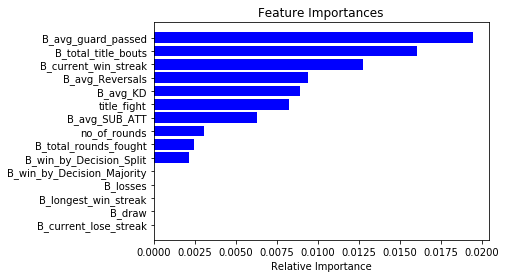

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,roc_auc_score    
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
import pprint

dt = DecisionTreeClassifier()
# # Optimizing hyperparameters while using 5-fold Cross validation
# param_grid = {
#     'criterion':['gini','entropy'],
#     'max_depth':[15,20,30,40,50,70,90,120,150]
# }
# clf = GridSearchCV(dt, param_grid)
# grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 1)
# grid_search.fit(X_train, y_train)
# pprint.pprint(grid_search.best_params_)
# pprint.pprint(grid_search.best_score_)


dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
preds = dt.predict(X_test)

# Confusion matrix
print(pd.crosstab(y_test,preds))
# Other metrics
print('F1-score:', f1_score(y_test, preds))
print('AUC score:', roc_auc_score(y_test, preds))


# Compute ROC curve and ROC area for class Red
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, preds)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plotting the feature importance barplot
features = []
for col in X_train.columns:
    features.append(col)
importances = clf.feature_importances_[:15]
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### SVM

col_0    0    1
row_0          
0      128  169
1      198  403
F1-score: 0.6871270247229327
AUC score: 0.5507627579175


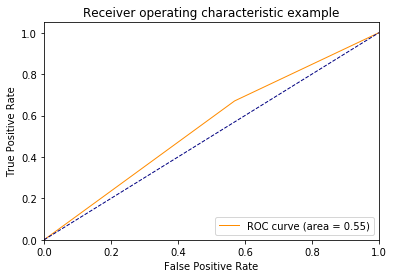

In [37]:
from sklearn import svm
from sklearn.metrics import f1_score,roc_auc_score  
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
import pprint

# svm = svm.SVC(kernel='linear')
# # Optimizing hyperparameters while using 5-fold Cross validation
# param_grid = {
#     'C': [0.1, 1, 10, 100], 
#     'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10],
#     'kernel': ['linear', 'rbf']}
# clf = GridSearchCV(svm, param_grid)
# grid_search = GridSearchCV(estimator = svm, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 1)
# grid_search.fit(X_train, y_train)
# pprint.pprint(grid_search.best_params_)
# pprint.pprint(grid_search.best_score_)


clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
clf_predictions = clf.predict(X_test)

# Confusion matrix
print(pd.crosstab(y_test,preds))
# Other metrics
print('F1-score:', f1_score(y_test, preds))
print('AUC score:', roc_auc_score(y_test, preds))

# Compute ROC curve and ROC area for class Red
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, preds)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()